In [1]:
%%html
<marquee style='width: 40%; color: red;'><b>Ehsan Shahriyari _____Data Analysis _____ Final Project</b></marquee>

---
---
#**1. Import libraries and preparation data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
import missingno as msno 
import plotly
import plotly.graph_objs as go
from scipy.stats import norm
from sklearn.impute import SimpleImputer
from scipy.stats.mstats import winsorize
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy.stats import probplot
import statsmodels.regression.linear_model as sm
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.cm as cm
import plotly.express as px

##**1.1 Loading the dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Data = pd.read_csv('/content/drive/MyDrive/Data_Analyst/Life Expectancy Data.csv')

Mounted at /content/drive



##**1.2 Understanding Data set**

In [4]:
Data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
Data.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [6]:
print('The shape of dataset  Is', Data.shape)

The shape of dataset  Is (2938, 22)



####**Life expectancy shows the number of years a person can expect to live.**
####**Life expectancy depends on several factors, the most important are gender and birth year. Generally, females have a higher life expectancy than males due to biological differences.**
---
#### **Adult Mortality	is the rate of death between people who ages between 15 to 60.**
---
####**Income composition of resources (ICOR) shows how a country uses its resources and it is between 0 to 1.**
---

In [7]:
print(Data.dtypes)

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object


**There are just two categorical variables : country and status**

**also The shape of dataset  Is (2938, 22)
So, the dataset has 2938 Rows and 22 Columns**

---
---
##**1.3 Missing values**

<Axes: >

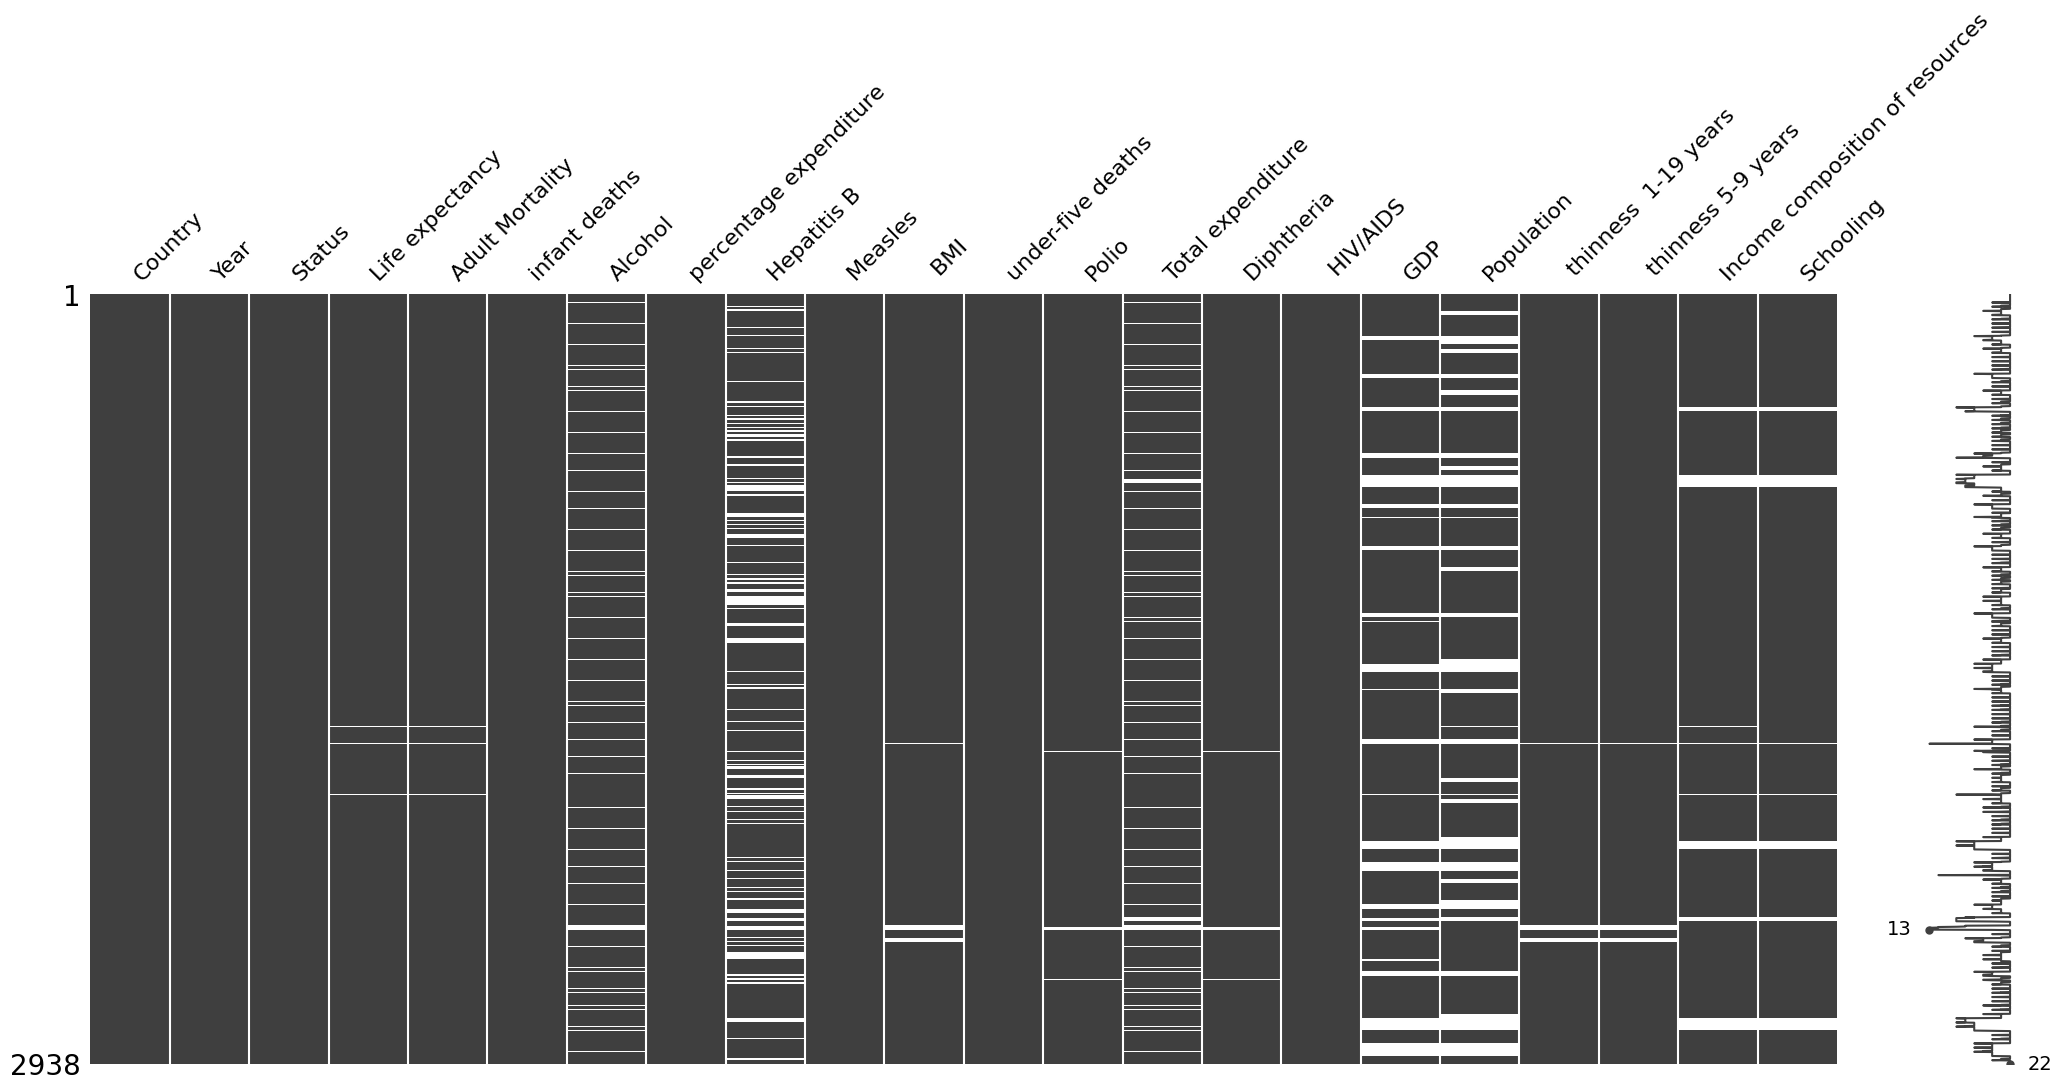

In [8]:
msno.matrix(Data)


In [9]:
MissingValues = Data.isnull().sum().sort_values(ascending=False)
MissingValuesPerc = ((Data.isnull().sum()/Data.isnull().count())*100).round(2).sort_values(ascending=False)
MissingData = pd.concat([MissingValues, MissingValuesPerc], axis=1,join='outer', keys=['Total Missing Values', '% of Total'])
MissingData.index.name ='Columns'
MissingData

,Total Missing Values,% of Total
Columns,,
Population,652,22.19
Hepatitis B,553,18.82
GDP,448,15.25
Total expenditure,226,7.69
Alcohol,194,6.60
Income composition of resources,167,5.68
Schooling,163,5.55
thinness 5-9 years,34,1.16
thinness 1-19 years,34,1.16


##**Filling null values with the mean of the country**




In [10]:
Data2 = Data.copy()

for column in Data2.columns[5:]:
    Data2[column] = Data2.groupby('Country').transform(lambda x: x.fillna(x.mean()))[column]
Data2MissingValues = Data2.isnull().sum().sort_values(ascending=False)
Data2MissingValuesPerc = (Data2.isnull().sum()/Data2.isnull().count()*100).round(2).sort_values(ascending=False)
Data2MissingData = pd.concat([Data2MissingValues, Data2MissingValuesPerc], axis=1,join='outer', keys=['Total Missing Values after fillna with country average', '% of Total '])
Data2MissingData

,Total Missing Values after fillna with country average,% of Total
Population,648,22.06
GDP,405,13.78
Income composition of resources,167,5.68
Schooling,163,5.55
Hepatitis B,144,4.90
thinness 5-9 years,34,1.16
thinness 1-19 years,34,1.16
BMI,34,1.16
Total expenditure,32,1.09
Alcohol,17,0.58


##**Filling null values with the median of the country**


In [11]:
Data3 = Data2.copy()

Data3.reset_index(inplace=True)
Data3.groupby('Country').apply(lambda group: group.interpolate(method= 'linear'))
imputed_data = []
for year in list(Data3.Year.unique()):
    year_data = Data3[Data3.Year == year].copy()
    for col in list(year_data.columns)[4:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().median()).copy()
    imputed_data.append(year_data)
Data3 = pd.concat(imputed_data).copy()

Data3MissingValues = Data3.isnull().sum().sort_values(ascending=False)
Data3MissingValuesPerc = (Data3.isnull().sum()/Data3.isnull().count()*100).round(2).sort_values(ascending=False)
Data3MissingData = pd.concat([Data3MissingValues, Data3MissingValuesPerc], axis=1,join='outer', keys=['Total Missing Values after fillna with country average and Median', '% of Total '])
Data3MissingData

,Total Missing Values after fillna with country average and Median,% of Total
index,0,0.0
under-five deaths,0,0.0
Income composition of resources,0,0.0
thinness 5-9 years,0,0.0
thinness 1-19 years,0,0.0
Population,0,0.0
GDP,0,0.0
HIV/AIDS,0,0.0
Diphtheria,0,0.0
Total expenditure,0,0.0


###**Splitting the dataset to categorical and numerical**

In [12]:
categorical_Data = Data3.select_dtypes(include=[np.object])
print(categorical_Data.columns, '\n')
numerical_Data = Data3.select_dtypes(include=[np.number])
print(numerical_Data.columns)

Index(['Country', 'Status'], dtype='object') 

Index(['index', 'Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


##**1.4 Outliers**

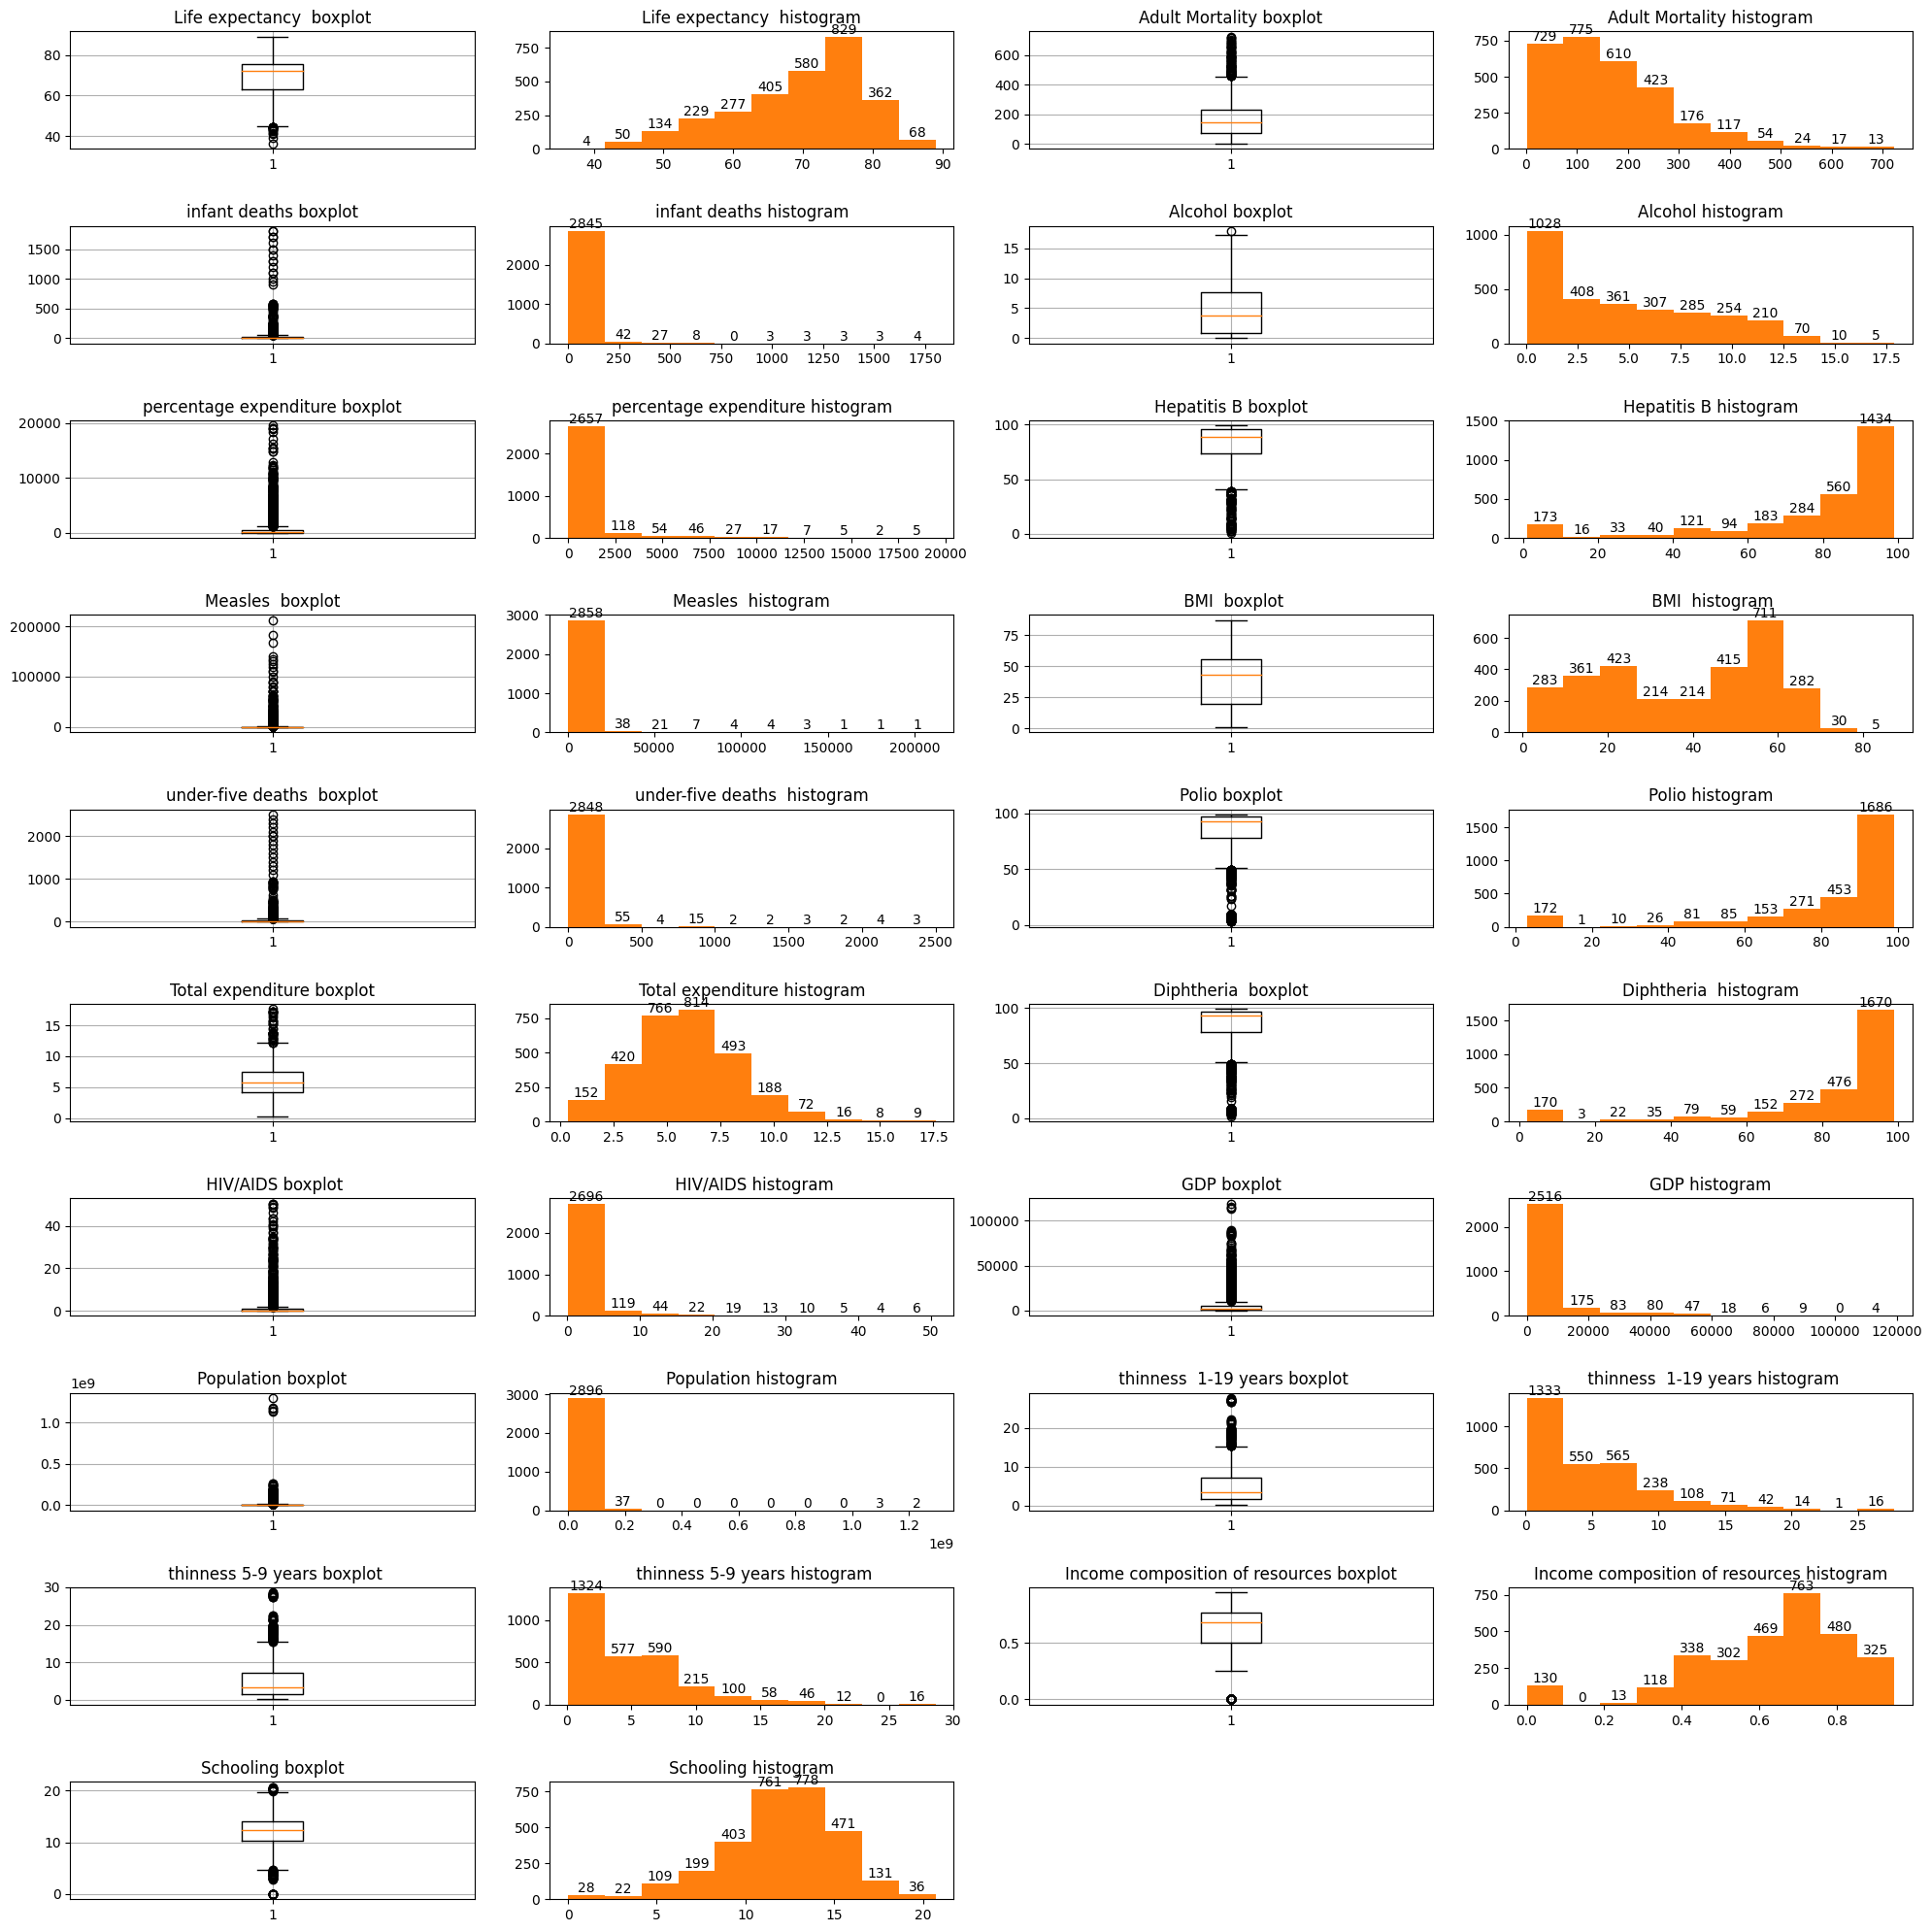

In [13]:
columns = numerical_Data.drop(['Year',  'index'], axis = 1)
plt.figure(figsize=(20, 20))
i = 0
for col_name in columns:
    i += 1
    plt.subplot(10, 4, i)
    plt.tight_layout()
    plt.boxplot(numerical_Data[col_name])
    plt.title('{} boxplot'.format(col_name))
    plt.grid(True)
    i += 1
    plt.subplot(10, 4, i )
    plt.tight_layout()
    counts, edges, bars = plt.hist(numerical_Data[col_name])
    plt.bar_label(bars)
    plt.hist(numerical_Data[col_name])
    plt.title('{} histogram'.format(col_name))
plt.show()

##**Winsorizing the outliers**

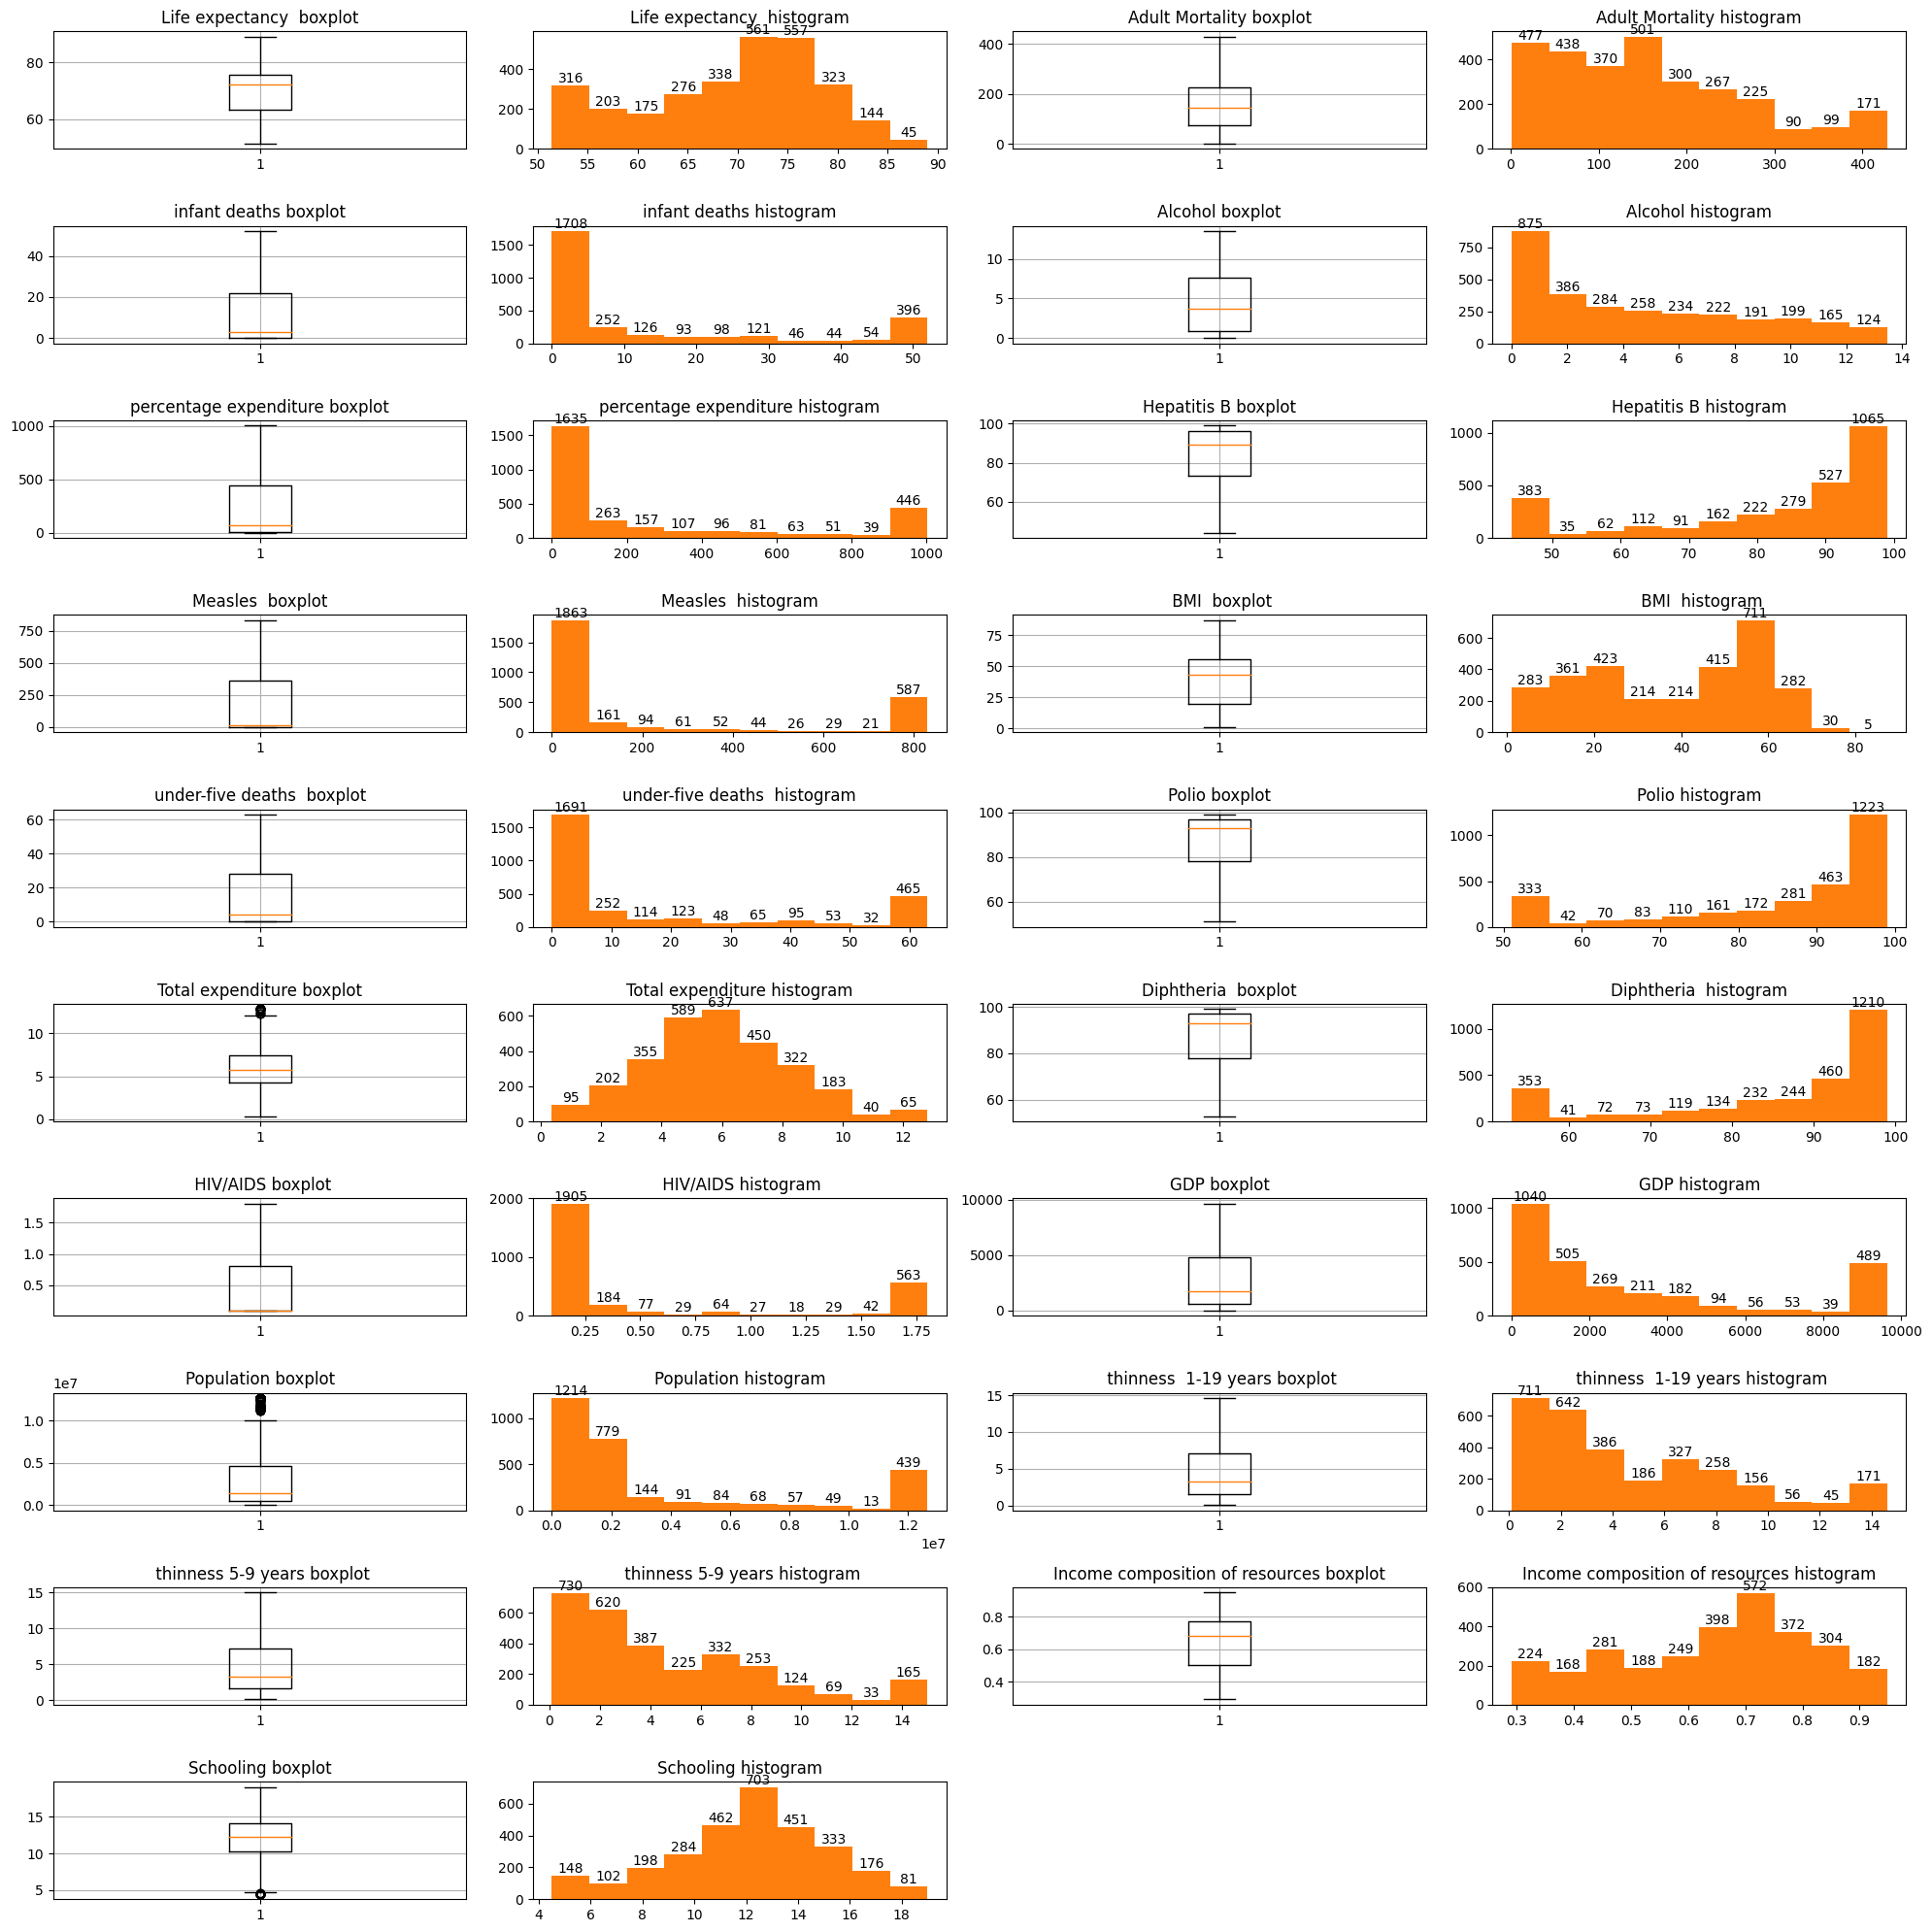

In [14]:
winsorized_data = numerical_Data.copy()

winsorized_data['Life expectancy '] = winsorize(numerical_Data['Life expectancy '], (0.05, 0))

winsorized_data['Adult Mortality'] = winsorize(numerical_Data['Adult Mortality'], (0, 0.04))

winsorized_data['infant deaths'] = winsorize(numerical_Data['infant deaths'], (0, 0.12))

winsorized_data['Alcohol'] = winsorize(numerical_Data['Alcohol'], (0, 0.01))

winsorized_data['percentage expenditure'] = winsorize(numerical_Data['percentage expenditure'], (0, 0.14))

winsorized_data['Hepatitis B'] = winsorize(numerical_Data['Hepatitis B'], (0.11, 0))

winsorized_data['Measles '] = winsorize(numerical_Data['Measles '], (0, 0.19))

winsorized_data['under-five deaths '] = winsorize(numerical_Data['under-five deaths '], (0, 0.145))

winsorized_data['Polio'] = winsorize(numerical_Data['Polio'], (0.1, 0))

winsorized_data['Total expenditure'] = winsorize(numerical_Data['Total expenditure'], (0, 0.01))

winsorized_data['Diphtheria '] = winsorize(numerical_Data['Diphtheria '], (0.11, 0))

winsorized_data[' HIV/AIDS'] = winsorize(numerical_Data[' HIV/AIDS'], (0, 0.185))

winsorized_data['GDP'] = winsorize(numerical_Data['GDP'], (0, 0.155))

winsorized_data['Population'] = winsorize(numerical_Data['Population'], (0, 0.14))

winsorized_data[' thinness  1-19 years'] = winsorize(numerical_Data[' thinness  1-19 years'], (0, 0.04))

winsorized_data[' thinness 5-9 years'] = winsorize(numerical_Data[' thinness 5-9 years'], (0, 0.04))

winsorized_data['Income composition of resources'] = winsorize(numerical_Data['Income composition of resources'], (0.05, 0))

winsorized_data['Schooling'] = winsorize(numerical_Data['Schooling'], (0.02, 0.01))

columns = winsorized_data.drop(['Year',  'index'], axis = 1)
plt.figure(figsize=(20, 20))
i = 0
for col_name in columns:
    i += 1
    plt.subplot(10, 4, i)
    plt.tight_layout()
    plt.boxplot(winsorized_data[col_name])
    plt.title('{} boxplot'.format(col_name))
    plt.grid(True)
    i += 1
    plt.subplot(10, 4, i )
    plt.tight_layout()
    counts, edges, bars = plt.hist(winsorized_data[col_name])
    plt.bar_label(bars)
    plt.hist(winsorized_data[col_name])
    plt.title('{} histogram'.format(col_name))
plt.show()

Text(0.5, 1.0, 'Skewness after winsorizing the outliers')

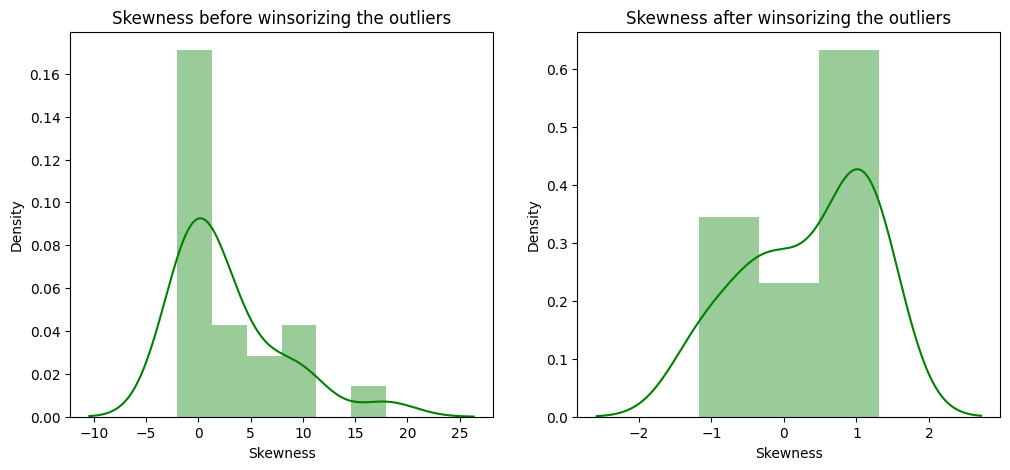

In [15]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.distplot(numerical_Data.skew(),color='green',axlabel ='Skewness')
plt.title('Skewness before winsorizing the outliers')
plt.subplot(1, 2, 2)
sns.distplot(winsorized_data.skew(),color='green',axlabel ='Skewness')
plt.title('Skewness after winsorizing the outliers')

##**2. Analysing The Data**

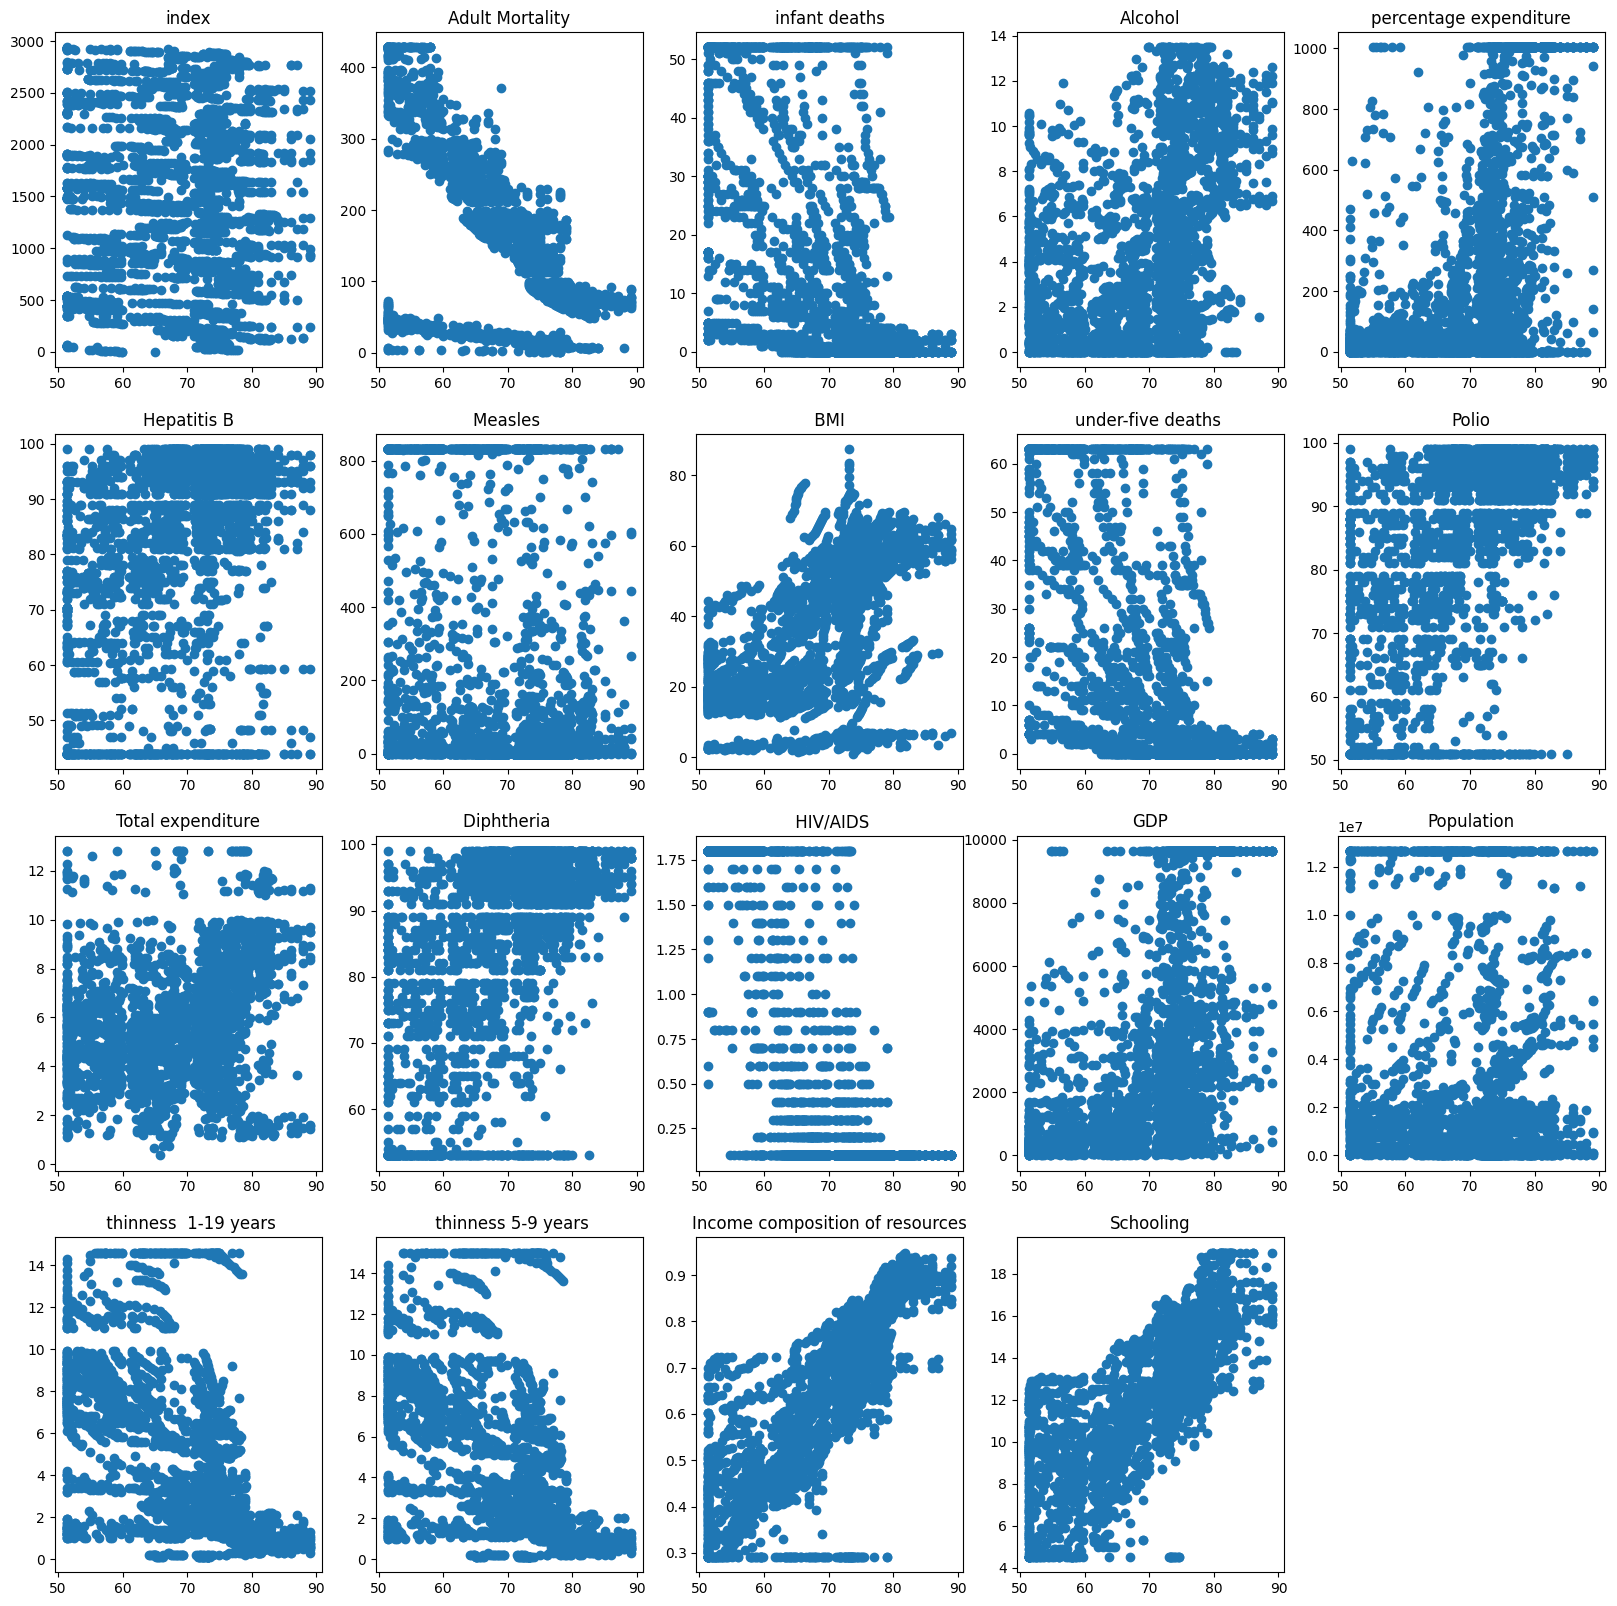

In [57]:
Data_clean = pd.concat([winsorized_data, Data['Country'], Data['Status']], axis = 1)

columns = Data_clean.columns.drop(['Life expectancy ', 'Year', 'Country', 'Status'])
plt.figure(figsize = (20, 20))
for i in range(len(columns)):
    plt.subplot(4, 5, i + 1)
    plt.scatter(winsorized_data['Life expectancy '], winsorized_data[columns[i]])
    plt.title(columns[i])
plt.show()

According to the Scatter plot, **Schooling**, **Income composition of resources** and **BMI** have a strong positive correlation with Life Expectancy. 

Also, **Adult Mortality**, **HIV/AIDS** have a negative correlation with Life Expectancy.

##**Correlation matrix**

<Axes: >

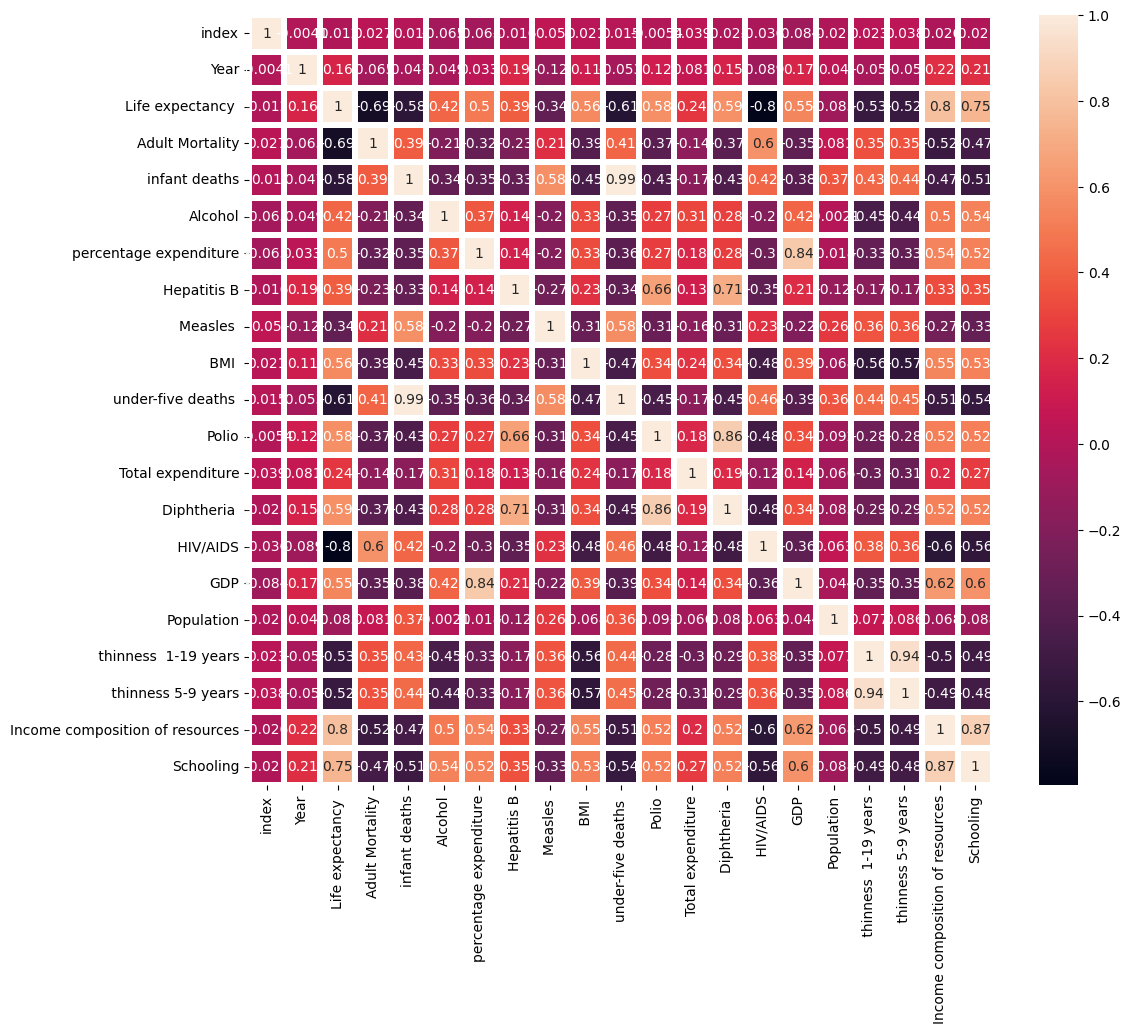

In [58]:
plt.figure(figsize = (12, 10))
sns.heatmap(winsorized_data.corr(), annot = True, linewidth = 3)

◾️ **Income composition of resources** ➡ positive correlation (0.8)

◾️ **Schooling** ➡ positive correlation (0.75)


◾️ **HIV/AIDS** ➡ negative correlation (-0.8)

◾️ **Adult Mortality** ➡ negative correlation (-0.69)

## **Developed and developing countries's life expectancy**

In [59]:
developedCountries = Data_clean[Data_clean['Status'] == 'Developed']
developingCountries =Data_clean[Data_clean['Status'] == 'Developing']

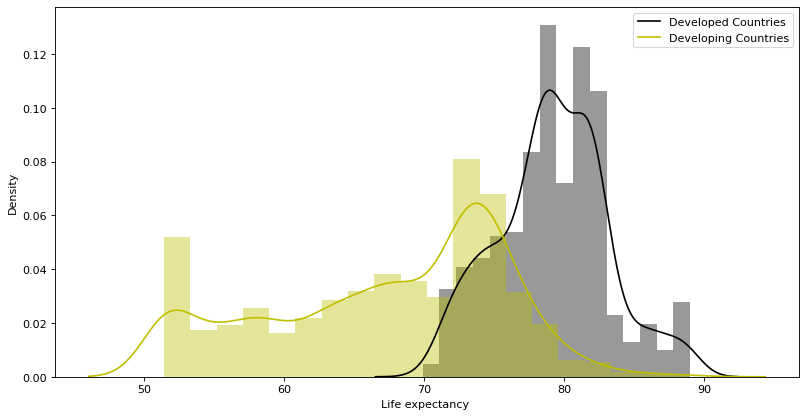

In [60]:
plt.figure(figsize=(12, 6), dpi=80)
sns.distplot(Data_clean[Data_clean['Status']=='Developed']['Life expectancy '], color = 'k')
sns.distplot(Data_clean[Data_clean['Status']=='Developing']['Life expectancy '],color='y')
labels=['Developed Countries','Developing Countries']
plt.legend(labels=labels,bbox_to_anchor=(1, 1))
plt.show()

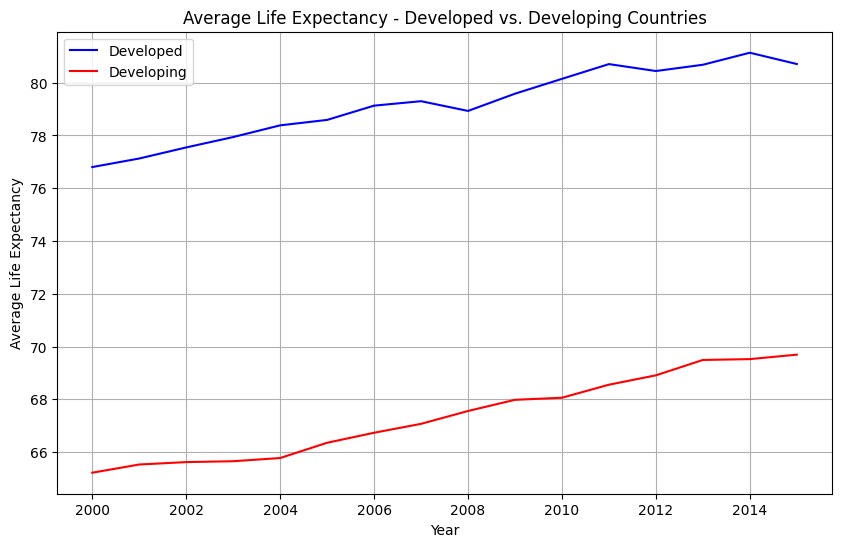

In [72]:
# Select the relevant columns for the plot
columns = ['Year', 'Life expectancy ', 'Status']

avg_life_expectancy_developed = developedCountries.groupby('Year')['Life expectancy '].mean()
avg_life_expectancy_developing = developingCountries.groupby('Year')['Life expectancy '].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_life_expectancy_developed.index, y=avg_life_expectancy_developed, label='Developed', color='blue')
sns.lineplot(x=avg_life_expectancy_developing.index, y=avg_life_expectancy_developing, label='Developing', color='red')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy - Developed vs. Developing Countries')
plt.legend()
plt.grid()
plt.show()

## **Life expectancy prediction using Linear Regression**

In [61]:
Data_clean2 = Data_clean.copy()
Data_clean2.replace(to_replace=['Developing', 'Developed'], value= [0, 1],  inplace=True)

In [62]:
x = Data_clean2[Data_clean.columns.drop(['Life expectancy ', 'Country', 'index'])]
y = Data_clean2['Life expectancy ']

x_train,  x_test,  y_train,  y_test = train_test_split(x,  y,  test_size=0.3,  random_state=421)

LR = LinearRegression()

LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
accuracy = LR.score(x_test, y_test)
print("The accuracy of LinearRegression is : ", accuracy)

The accuracy of LinearRegression is :  0.8667508039571331


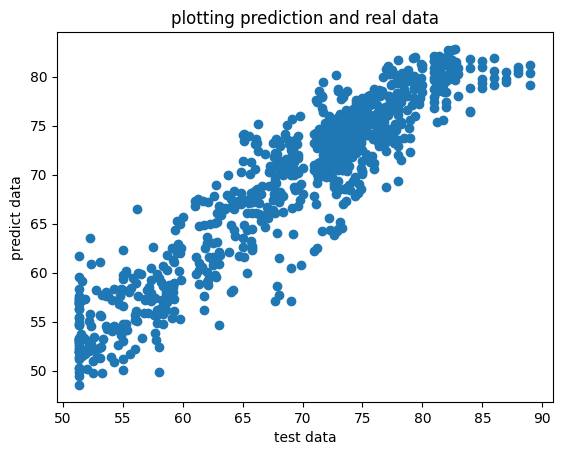

In [63]:
plt.scatter(y_test, y_pred)
plt.xlabel('test data')
plt.ylabel('predict data')
plt.title('plotting prediction and real data')
plt.show()


#**3. Visualization**

##Visualize some kind of the disease variables and life expectancy.

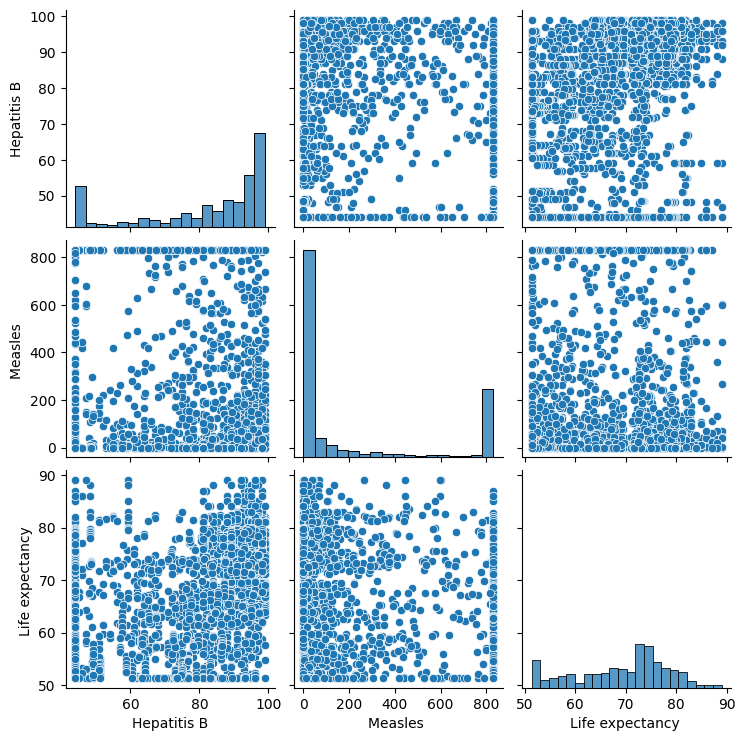

In [64]:
# Select the relevant columns for the scatterplot matrix
columns = ['Hepatitis B', 'Measles ', 'Life expectancy ']

# Create the scatterplot matrix
sns.pairplot(Data_clean[columns])

# Show the plot
plt.show()


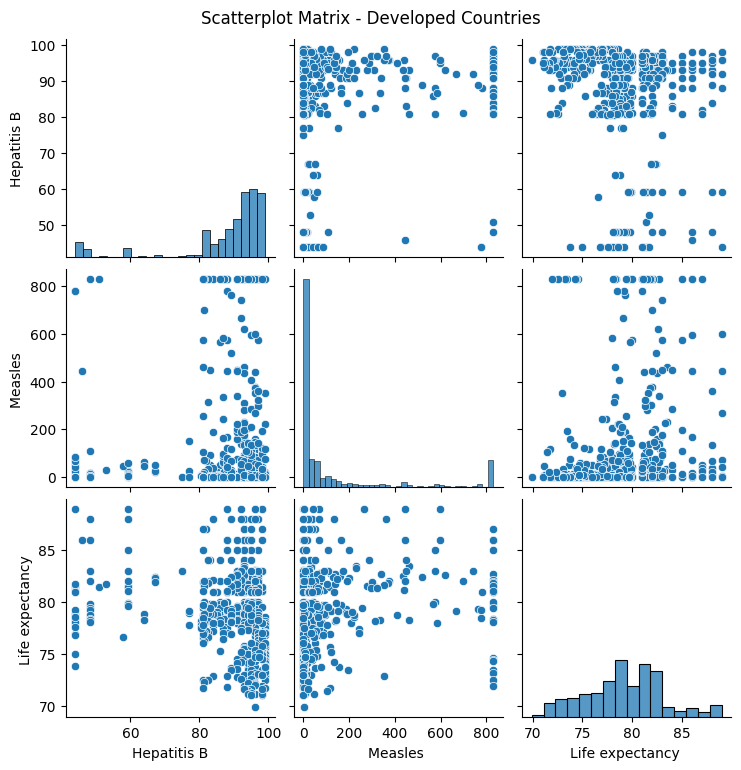

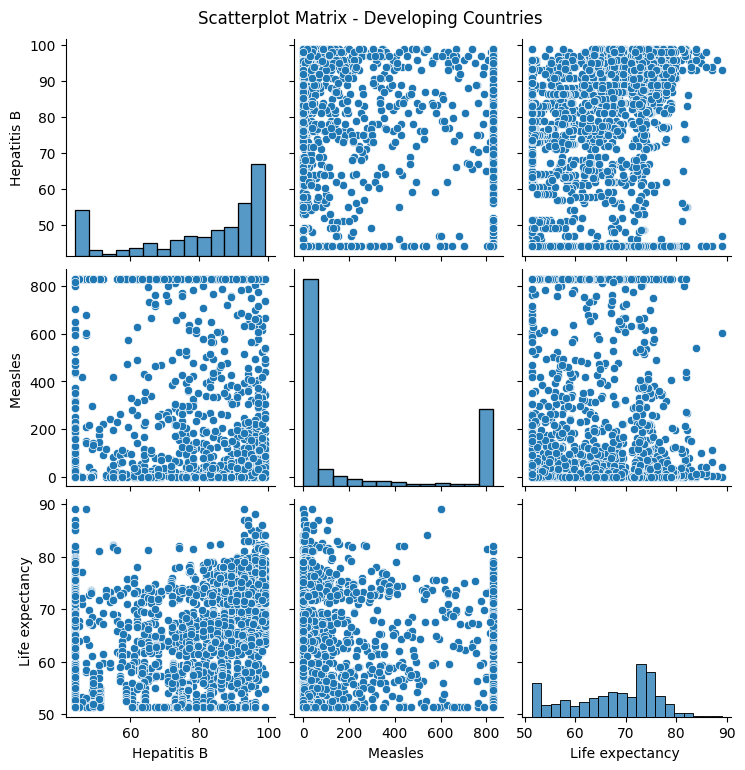

In [67]:
# Select the relevant columns for the scatterplot matrix
columns = ['Hepatitis B', 'Measles ',  'Life expectancy ', 'Status']

# Filter the data for developed countries
developed_countries = Data_clean[Data_clean['Status'] == 'Developed']

# Filter the data for undeveloped countries
Developing_countries = Data_clean[Data_clean['Status'] == 'Developing']

# Create the scatterplot matrix for developed countries
sns.pairplot(developed_countries[columns])
plt.suptitle('Scatterplot Matrix - Developed Countries', y=1.02)

# Create the scatterplot matrix for Developing countries
sns.pairplot(Developing_countries[columns])
plt.suptitle('Scatterplot Matrix - Developing Countries', y=1.02)

# Show the plots
plt.show()


##Author : 
> **Ehsan Shahriyari**
---

